In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('service.csv')

In [3]:
df.shape

(1745, 14)

In [4]:
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5


In [5]:
df.isnull().sum()

asset_nbr              0
asset_stats            0
install_dt             0
modlty_full            0
custmr_catgry_full    26
custmr_typ_full        0
srv_regn_full          0
divsn_full             0
warrnty_start_dt       0
warrnty_end_dt         0
contract_flag          0
warrnty_end_mnth       0
warrnty_flg            0
inputrowindex          0
dtype: int64

In [8]:
df['custmr_catgry_full'].unique()

array([nan, 'CUSTMR_CATGRY0', 'CUSTMR_CATGRY1', 'CUSTMR_CATGRY2',
       'CUSTMR_CATGRY3', 'CUSTMR_CATGRY4', 'CUSTMR_CATGRY5',
       'CUSTMR_CATGRY6', 'CUSTMR_CATGRY7', 'CUSTMR_CATGRY8',
       'CUSTMR_CATGRY9', 'CUSTMR_CATGRY10', 'CUSTMR_CATGRY11',
       'CUSTMR_CATGRY12', 'CUSTMR_CATGRY13', 'CUSTMR_CATGRY14',
       'CUSTMR_CATGRY15', 'CUSTMR_CATGRY16', 'CUSTMR_CATGRY17',
       'CUSTMR_CATGRY18', 'CUSTMR_CATGRY19', 'CUSTMR_CATGRY20'],
      dtype=object)

In [7]:
df['custmr_catgry_full'].nunique()

21

In [23]:
df.shape

(1745, 14)

### Frequent Category Imputation

In [13]:
df.groupby(['custmr_catgry_full'])['custmr_catgry_full'].count().sort_values(ascending=False)

custmr_catgry_full
CUSTMR_CATGRY4     571
CUSTMR_CATGRY0     393
CUSTMR_CATGRY1     362
CUSTMR_CATGRY7      78
CUSTMR_CATGRY9      75
CUSTMR_CATGRY2      47
CUSTMR_CATGRY8      35
CUSTMR_CATGRY12     28
CUSTMR_CATGRY14     27
CUSTMR_CATGRY10     23
CUSTMR_CATGRY5      21
CUSTMR_CATGRY6      17
CUSTMR_CATGRY11     11
CUSTMR_CATGRY13      7
CUSTMR_CATGRY3       6
CUSTMR_CATGRY15      6
CUSTMR_CATGRY16      4
CUSTMR_CATGRY18      4
CUSTMR_CATGRY19      2
CUSTMR_CATGRY20      1
CUSTMR_CATGRY17      1
Name: custmr_catgry_full, dtype: int64

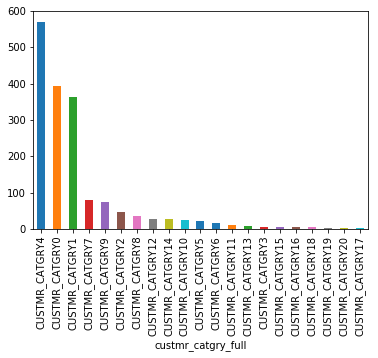

In [10]:
df.groupby(['custmr_catgry_full'])['custmr_catgry_full'].count().sort_values(ascending=False).plot.bar()

In [14]:
# with this command we capture the most frequent label
df.groupby(['custmr_catgry_full'])['custmr_catgry_full'].count().sort_values(ascending=False).index[0]

'CUSTMR_CATGRY4'

In [15]:
# let's create a variable to replace NA with the most frequent label

def impute_na(df, variable):
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df[variable+ '_most_frequent'] = df[variable].fillna(most_frequent_category)

In [16]:
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1


In [12]:
df.isnull().sum()

asset_nbr                            0
asset_stats                          0
install_dt                           0
modlty_full                          0
custmr_catgry_full                  26
custmr_typ_full                      0
srv_regn_full                        0
divsn_full                           0
warrnty_start_dt                     0
warrnty_end_dt                       0
contract_flag                        0
warrnty_end_mnth                     0
warrnty_flg                          0
inputrowindex                        0
custmr_catgry_full_most_frequent     0
dtype: int64

### Random sample imputation

In [17]:
# let's create a variable to replace NA with a random sample

def impute_na(df, variable):
    # random sampling
    df[variable+'_random'] = df[variable]
        
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), 
                                                 random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [18]:
# let's replace the NA with the random sample
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent,custmr_catgry_full_random
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4,CUSTMR_CATGRY1
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0,CUSTMR_CATGRY0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0,CUSTMR_CATGRY0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1,CUSTMR_CATGRY1
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1,CUSTMR_CATGRY1


### Adding a variable to capture missing values

In [19]:
# let's create a variable to capture NA to indicate missingness
def impute_na(df, variable):
    # add additional variable to indicate missingness
    df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)

In [20]:
# let's check missingness in new variable
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent,custmr_catgry_full_random,custmr_catgry_full_NA
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4,CUSTMR_CATGRY1,1
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0,CUSTMR_CATGRY0,0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0,CUSTMR_CATGRY0,0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1,CUSTMR_CATGRY1,0
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1,CUSTMR_CATGRY1,0


### Adding a category to capture NA

In [21]:
# let's create a category to replace NA

def impute_na(df, variable):
    df[variable+'_NA'] = np.where(df[variable].isnull(), 'Missing', df[variable])
    #df[variable+'_NA'] = df[variable].fillna('Missing')

In [22]:
# let's check missingness iwith new category
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent,custmr_catgry_full_random,custmr_catgry_full_NA
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4,CUSTMR_CATGRY1,Missing
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0,CUSTMR_CATGRY0,CUSTMR_CATGRY0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0,CUSTMR_CATGRY0,CUSTMR_CATGRY0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1,CUSTMR_CATGRY1,CUSTMR_CATGRY1
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1,CUSTMR_CATGRY1,CUSTMR_CATGRY1


In [35]:
df.isnull().sum()

asset_nbr                            0
asset_stats                          0
install_dt                           0
modlty_full                          0
custmr_catgry_full                  26
custmr_typ_full                      0
srv_regn_full                        0
divsn_full                           0
warrnty_start_dt                     0
warrnty_end_dt                       0
contract_flag                        0
warrnty_end_mnth                     0
warrnty_flg                          0
inputrowindex                        0
custmr_catgry_full_most_frequent     0
custmr_catgry_full_random            0
custmr_catgry_full_NA                0
dtype: int64

In [36]:
df['custmr_catgry_full_NA'].nunique()

22

In [20]:
df['custmr_catgry_full'].nunique()

21

In [22]:
df[df['custmr_catgry_full'].isnull()][['custmr_catgry_full','custmr_catgry_full_most_frequent','custmr_catgry_full_random']]

,custmr_catgry_full,custmr_catgry_full_most_frequent,custmr_catgry_full_random
0,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY1
17,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY5
177,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
213,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY0
221,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
480,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY0
512,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
614,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY1
954,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
1050,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY0


In [23]:
missing_df = df.isnull().sum()
missing_df

asset_nbr                            0
asset_stats                          0
install_dt                           0
modlty_full                          0
custmr_catgry_full                  26
custmr_typ_full                      0
srv_regn_full                        0
divsn_full                           0
warrnty_start_dt                     0
warrnty_end_dt                       0
contract_flag                        0
warrnty_end_mnth                     0
warrnty_flg                          0
inputrowindex                        0
custmr_catgry_full_most_frequent     0
custmr_catgry_full_random            0
custmr_catgry_full_NA                0
dtype: int64

In [24]:
missing_df[missing_df.values != 0].index

Index(['custmr_catgry_full'], dtype='object')

In [ ]:
for col in missing_df[missing_df.values != 0].index:
    if(df[col].dtype == 'O'):
        impute_cat(df,col)
    else
        impute_num(df, col)